# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
data = pd.read_csv('../data/raw/supplemental_clinical_data.csv')
data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2218,65382_0,65382,0,NaN,NaN,0.0,NaN,NaN
2219,65405_0,65405,0,5.0,16.0,31.0,0.0,NaN
2220,65405_5,65405,5,NaN,NaN,57.0,NaN,NaN
2221,65530_0,65530,0,10.0,6.0,24.0,0.0,NaN


# Basic analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2223 non-null   object 
 1   patient_id                           2223 non-null   int64  
 2   visit_month                          2223 non-null   int64  
 3   updrs_1                              2010 non-null   float64
 4   updrs_2                              2009 non-null   float64
 5   updrs_3                              2218 non-null   float64
 6   updrs_4                              1295 non-null   float64
 7   upd23b_clinical_state_on_medication  1122 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 139.1+ KB


In [4]:
data.upd23b_clinical_state_on_medication.value_counts()

On     1093
Off      29
Name: upd23b_clinical_state_on_medication, dtype: int64

In [5]:
data.visit_month.value_counts()

0     771
36    258
6     248
12    235
30    223
24    194
18    176
5     118
Name: visit_month, dtype: int64

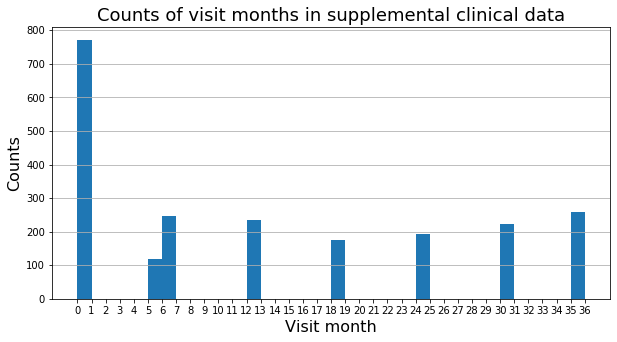

In [15]:
fig, ax = plt.subplots(1,figsize=(10,5))
ax.hist(data.visit_month,bins = np.arange(max(data.visit_month)+1))
ax.set_title('Counts of visit months in supplemental clinical data',fontsize=18)
ax.set_xticks(np.arange(max(data.visit_month)+1))
ax.set_xlabel('Visit month',fontsize=16)
ax.set_ylabel('Counts',fontsize=16)
ax.grid(axis='y')

In [39]:
updrs_means = data.groupby('visit_month').mean()
updrs_means

,patient_id,updrs_1,updrs_2,updrs_3,updrs_4
visit_month,,,,,
0,32143.075227,5.781065,6.210059,19.782835,1.044503
5,30682.983051,NaN,NaN,38.737288,4.400000
6,33341.991935,5.032258,6.443548,23.591093,0.457627
12,33263.306383,5.234043,6.225532,23.378723,0.579365
18,33179.596591,5.329545,6.681818,24.267045,0.629032
24,32532.917526,5.845361,6.773196,24.077320,0.913907
30,33332.834081,5.582960,6.572072,23.382883,0.861111
36,31495.422481,6.674419,7.232558,21.766537,0.589147


In [40]:
data.loc[data.visit_month == 5, ['updrs_1', 'updrs_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 12 to 2220
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   updrs_1  0 non-null      float64
 1   updrs_2  0 non-null      float64
dtypes: float64(2)
memory usage: 2.8 KB


In [41]:
updrs_stds = data.groupby('visit_month').std()
updrs_stds

,patient_id,updrs_1,updrs_2,updrs_3,updrs_4
visit_month,,,,,
0,18753.879844,4.391507,5.152802,12.150571,2.212019
5,18018.396157,NaN,NaN,13.580673,2.720294
6,18542.148672,4.031125,4.581785,10.629324,1.119144
12,18593.250469,4.147972,4.539027,11.143066,1.364423
18,18093.077616,4.157531,4.784607,11.438893,1.445305
24,18438.534108,4.574859,5.050020,11.218009,1.628662
30,18620.517925,4.328938,5.067127,10.921865,1.732902
36,19331.285286,4.663231,5.142350,11.550837,1.726932


In [42]:
updrs_means = updrs_means.drop(index = 5)
updrs_stds = updrs_stds.drop(index = 5)
print(updrs_means)
print(updrs_stds)

               patient_id   updrs_1   updrs_2    updrs_3   updrs_4
visit_month                                                       
0            32143.075227  5.781065  6.210059  19.782835  1.044503
6            33341.991935  5.032258  6.443548  23.591093  0.457627
12           33263.306383  5.234043  6.225532  23.378723  0.579365
18           33179.596591  5.329545  6.681818  24.267045  0.629032
24           32532.917526  5.845361  6.773196  24.077320  0.913907
30           33332.834081  5.582960  6.572072  23.382883  0.861111
36           31495.422481  6.674419  7.232558  21.766537  0.589147
               patient_id   updrs_1   updrs_2    updrs_3   updrs_4
visit_month                                                       
0            18753.879844  4.391507  5.152802  12.150571  2.212019
6            18542.148672  4.031125  4.581785  10.629324  1.119144
12           18593.250469  4.147972  4.539027  11.143066  1.364423
18           18093.077616  4.157531  4.784607  11.438893  1.44

Text(0.5, 1.0, 'updrs_4')

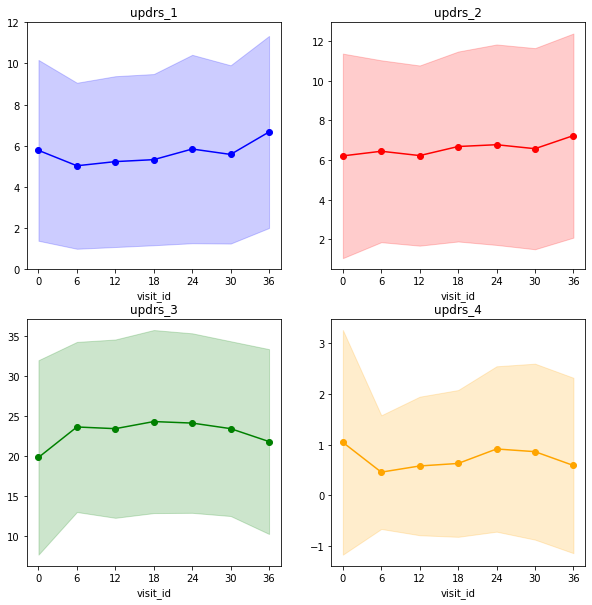

In [55]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10,10))
ax[0,0].plot(updrs_means.index.values, updrs_means.updrs_1, marker='o', color='b')
ax[0,0].fill_between(updrs_stds.index.values, updrs_means.updrs_1-updrs_stds.updrs_1,  
                     updrs_means.updrs_1+updrs_stds.updrs_1 ,alpha=0.2, color='b')
ax[0,0].set_xticks(updrs_stds.index.values)
ax[0,0].set_xlabel('visit_id')
ax[0,0].set_title('updrs_1')
ax[0,0].set_ylim([0,12])

ax[0,1].plot(updrs_means.index.values, updrs_means.updrs_2, marker='o', color='r')
ax[0,1].fill_between(updrs_stds.index.values, updrs_means.updrs_2-updrs_stds.updrs_2,  
                     updrs_means.updrs_2+updrs_stds.updrs_2 ,alpha=0.2, color='r')
ax[0,1].set_xticks(updrs_stds.index.values)
ax[0,1].set_xlabel('visit_id')
ax[0,1].set_title('updrs_2')

ax[1,0].plot(updrs_means.index.values, updrs_means.updrs_3, marker='o', color='g')
ax[1,0].fill_between(updrs_stds.index.values, updrs_means.updrs_3-updrs_stds.updrs_3,  
                     updrs_means.updrs_3+updrs_stds.updrs_3 ,alpha=0.2, color='g')
ax[1,0].set_xticks(updrs_stds.index.values)
ax[1,0].set_xlabel('visit_id')
ax[1,0].set_title('updrs_3')

ax[1,1].plot(updrs_means.index.values, updrs_means.updrs_4, marker='o', color='orange')
ax[1,1].fill_between(updrs_stds.index.values, updrs_means.updrs_4-updrs_stds.updrs_4,  
                     updrs_means.updrs_4+updrs_stds.updrs_4 ,alpha=0.2, color='orange')
ax[1,1].set_xticks(updrs_stds.index.values)
ax[1,1].set_xlabel('visit_id')
ax[1,1].set_title('updrs_4')

# Summary so far

Lots of NaNs. visit_id 5 almost useless as it contains all NaNs for updrs_1 and updrs_2. May be able to backfill from month 6. Many patients did an initial visit but no further follow ups. The progression of updrs scores over time has a high degree of variability as indicated by the plots. No obvious steadily increasing trend (higher score indicates more sever symptoms).
I will exclude patients that were on medication for these visits and see if this affects trends. Note that most of the medication data is NaN - does this mean 'Off' or was the data simply not recorded?

In [57]:
non_med_data = data.loc[data.upd23b_clinical_state_on_medication != 'On',:]
non_med_means = non_med_data.groupby('visit_month').mean()
non_med_stds = non_med_data.groupby('visit_month').std()
non_med_means = non_med_means.drop(index = 5)
non_med_stds = non_med_stds.drop(index = 5)
print(non_med_means)
print(non_med_stds)

               patient_id   updrs_1   updrs_2    updrs_3   updrs_4
visit_month                                                       
0            31871.395489  5.963158  6.180702  19.592760  1.090164
6            32473.923077  4.965812  6.119658  24.879310  2.000000
12           32282.027027  4.675676  5.364865  25.418919  2.636364
18           29851.488372  4.744186  7.302326  26.767442  0.769231
24           31505.864865  4.540541  6.513514  25.378378  2.000000
30           26564.393939  6.333333  7.424242  27.812500  1.363636
36           33744.558140  5.627907  6.395349  27.883721  0.209302
               patient_id   updrs_1   updrs_2    updrs_3   updrs_4
visit_month                                                       
0            18840.329368  4.526087  5.228082  12.529846  2.248911
6            19670.846926  3.930280  4.575351  10.822003  2.449490
12           20600.033488  3.653139  4.025856  10.921898  2.693426
18           20052.628327  3.288458  4.688054  10.512662  1.53

Text(0.5, 0.98, 'Non-medicated patient UPDRS scores')

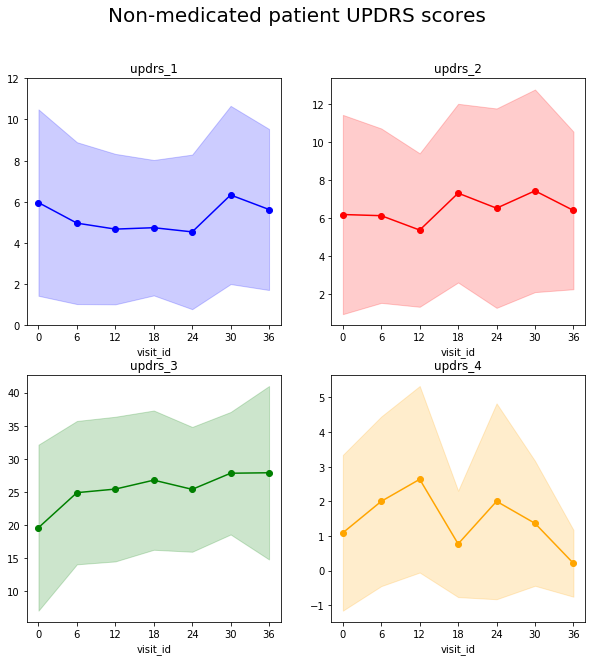

In [58]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10,10))
ax[0,0].plot(non_med_means.index.values, non_med_means.updrs_1, marker='o', color='b')
ax[0,0].fill_between(non_med_stds.index.values, non_med_means.updrs_1-non_med_stds.updrs_1,  
                     non_med_means.updrs_1+non_med_stds.updrs_1 ,alpha=0.2, color='b')
ax[0,0].set_xticks(non_med_stds.index.values)
ax[0,0].set_xlabel('visit_id')
ax[0,0].set_title('updrs_1')
ax[0,0].set_ylim([0,12])

ax[0,1].plot(non_med_means.index.values, non_med_means.updrs_2, marker='o', color='r')
ax[0,1].fill_between(non_med_stds.index.values, non_med_means.updrs_2-non_med_stds.updrs_2,  
                     non_med_means.updrs_2+non_med_stds.updrs_2 ,alpha=0.2, color='r')
ax[0,1].set_xticks(non_med_stds.index.values)
ax[0,1].set_xlabel('visit_id')
ax[0,1].set_title('updrs_2')

ax[1,0].plot(non_med_means.index.values, non_med_means.updrs_3, marker='o', color='g')
ax[1,0].fill_between(non_med_stds.index.values, non_med_means.updrs_3-non_med_stds.updrs_3,  
                     non_med_means.updrs_3+non_med_stds.updrs_3 ,alpha=0.2, color='g')
ax[1,0].set_xticks(non_med_stds.index.values)
ax[1,0].set_xlabel('visit_id')
ax[1,0].set_title('updrs_3')

ax[1,1].plot(non_med_means.index.values, non_med_means.updrs_4, marker='o', color='orange')
ax[1,1].fill_between(non_med_stds.index.values, non_med_means.updrs_4-non_med_stds.updrs_4,  
                     non_med_means.updrs_4+non_med_stds.updrs_4 ,alpha=0.2, color='orange')
ax[1,1].set_xticks(non_med_stds.index.values)
ax[1,1].set_xlabel('visit_id')
ax[1,1].set_title('updrs_4')

fig.suptitle('Non-medicated patient UPDRS scores',fontsize=20)

As expected, the removal of medicated subjects affected the trend of updrs3. More obvious, steadily increasing trend.

Next task: plot both trendlines on top of each other.